In [9]:
import matplotlib.pyplot as plt

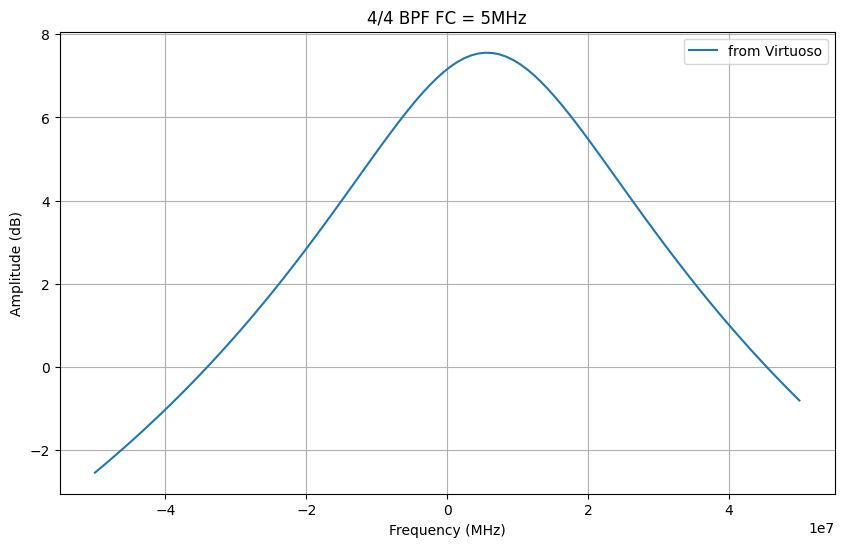

In [10]:
file_path = 'docs/4_4_5M_TF.txt'

frequencies = []
dB_values = []

with open(file_path, 'r') as file:
    for line in file:
        # Skip comment lines
        if line.startswith(';'):
            continue
        # Split the line by comma and convert to float
        try:
            freq, dB = map(float, line.split(','))
            frequencies.append(freq)
            dB_values.append(dB)
        except ValueError:
            # In case of a malformed line, print a message and skip
            print(f"Skipping malformed line: {line.strip()}")

plt.figure(figsize=(10, 6))
plt.plot(frequencies, dB_values, label='from Virtuoso')
plt.title('4/4 BPF FC = 5MHz')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()
plt.show()
